# 0. Setup Paths

In [60]:
import os

In [61]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [62]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [63]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [64]:
print(os.name)
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

posix


In [65]:
paths

{'WORKSPACE_PATH': 'Tensorflow/workspace',
 'SCRIPTS_PATH': 'Tensorflow/scripts',
 'APIMODEL_PATH': 'Tensorflow/models',
 'ANNOTATION_PATH': 'Tensorflow/workspace/annotations',
 'IMAGE_PATH': 'Tensorflow/workspace/images',
 'MODEL_PATH': 'Tensorflow/workspace/models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow/workspace/pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet',
 'OUTPUT_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet/export',
 'TFJS_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport',
 'TFLITE_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport',
 'PROTOC_PATH': 'Tensorflow/protoc'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !sudo su
    print(os)
    !naileska170616
    print(os)
    !apt-get install protobuf-compiler
    print(os)
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    print(os)
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    print("1")
    wget.download(url)
    print("2")
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    print("3")
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-04-25 00:01:10.879190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 00:01:10.879212: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-25 00:01:13.129540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-25 00:01:13.129565: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-25 00:01:13.129582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: yayokings-B450M-DS3H
2022-04-25 00:01:13.129588: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: yayokings-B45

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.12s
I0425 00:01:15.447738 140073179961152 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.12s
[       OK ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_models_from_config
I0425 00:01:15.540441 140073179961152 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b0
I0425 00:01:15.540538 140073179961152 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 64
I0425 00:01:15.540572 140073179961152 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 3
I0425 00:01:15.541776 140073179961152 efficientnet_model.py:144] round_filter input=32 output=32
I0425 00:01:15.550044 140073179961152 efficientnet_model.py:144] round_filter input=32 output=32
I0425 00:01:15.550102 140073179961152 eff

I0425 00:01:17.479915 140073179961152 efficientnet_model.py:144] round_filter input=16 output=16
I0425 00:01:17.480009 140073179961152 efficientnet_model.py:144] round_filter input=24 output=24
I0425 00:01:17.594166 140073179961152 efficientnet_model.py:144] round_filter input=24 output=24
I0425 00:01:17.594261 140073179961152 efficientnet_model.py:144] round_filter input=40 output=48
I0425 00:01:17.708446 140073179961152 efficientnet_model.py:144] round_filter input=40 output=48
I0425 00:01:17.708539 140073179961152 efficientnet_model.py:144] round_filter input=80 output=88
I0425 00:01:17.881436 140073179961152 efficientnet_model.py:144] round_filter input=80 output=88
I0425 00:01:17.881541 140073179961152 efficientnet_model.py:144] round_filter input=112 output=120
I0425 00:01:18.050263 140073179961152 efficientnet_model.py:144] round_filter input=112 output=120
I0425 00:01:18.050361 140073179961152 efficientnet_model.py:144] round_filter input=192 output=208
I0425 00:01:18.258332 14

I0425 00:01:20.606402 140073179961152 efficientnet_model.py:144] round_filter input=112 output=160
I0425 00:01:20.606507 140073179961152 efficientnet_model.py:144] round_filter input=192 output=272
I0425 00:01:20.993875 140073179961152 efficientnet_model.py:144] round_filter input=192 output=272
I0425 00:01:20.994018 140073179961152 efficientnet_model.py:144] round_filter input=320 output=448
I0425 00:01:21.150094 140073179961152 efficientnet_model.py:144] round_filter input=1280 output=1792
I0425 00:01:21.177597 140073179961152 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0425 00:01:25.178764 140073179961152 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b7
I0425 00:01:25.178896 140073179961152 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 384
I0425 00:01:25.178936 140073179961152 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 8
I0425 00:01:25.180192 140073179961152 efficientnet_model.py:144] round_filter input=32 output=64
I0425 00:01:25.190765 140073179961152 efficientnet_model.py:144] round_filter input=32 output=64
I0425 00:01:25.190871 140073179961152 efficientnet_model.py:144] round_filter input=16 output=32
I0425 00:01:25.312956 140073179961152 efficientnet_model.py:144] round_filter input=16 output=32
I0425 00:01:25.313051 140073179961152 efficientnet_model.py:144] round_filter input=24 output=48
I0425 00:01:25.825325 140073179961152 efficientnet_model.py:144] round_filter input=24 output=48
I0425 00:01:25.825420 14

In [15]:
!pip install tensorflow --upgrade

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tf_estimator_nightly-2.5.0.dev2021032501-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow-datasets 4.2.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.2.0 requires dill, which is not installed.
tensorflow-datasets 4.2.0 requires future, which is not installed.
tensorflow-datasets 4.2.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.2.0 re

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [9]:
import object_detection

In [10]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
apache-beam                   2.38.0
asttokens                     2.0.5
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    5.0.0
certifi                       2021.10.8
charset-normalizer            2.0.12
cloudpickle                   2.0.0
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.28
debugpy                       1.6.0
decorator                     5.1.1
dill                          0.3.1.1
dm-tree                       0.1.7
docopt                        0.6.2
entrypoints                   0.4
executing                     0.8.3
fastavro                      1.4.10
flatbuffers                   2.0
fonttools                     4.33.2
gas

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-04-25 00:38:26--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolviendo download.tensorflow.org (download.tensorflow.org)... 142.250.64.176, 2607:f8b0:4008:801::2010
Conectando con download.tensorflow.org (download.tensorflow.org)[142.250.64.176]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 20515344 (20M) [application/x-tar]
Guardando como: “ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz”

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  2,51MB/s    en 8,3s    

2022-04-25 00:38:35 (2,35 MB/s) - “ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz” guardado [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlit

# 2. Create Label Map

In [16]:
labels = [{'name':'Panel', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [23]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [24]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [26]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [1]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2022-05-07 10:36:52.466098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 10:36:52.466130: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [28]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [29]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [30]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [31]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [32]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [33]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [34]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [35]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [36]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [37]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [66]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [67]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [68]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [70]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '20220129_105709_R.jpg')

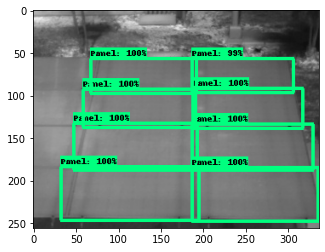

In [71]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=16,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [14]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [37]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [38]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [39]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [40]:
!{command}

2022-04-26 22:20:29.185932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yayokings/Documentos/AI_IRT_Project/TFODCourse/IRT/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-26 22:20:29.185960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-26 22:20:30.860842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 22:20:30.861206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yayokings/Document

W0426 22:20:50.181677 140137296213824 save.py:260] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 104). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I0426 22:20:53.414499 140137296213824 builder_impl.py:779] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config
I0426 22:20:53.968302 140137296213824 config_util.py:253] Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config


# 11. Conversion to TFJS

In [49]:
!pip install tensorflowjs

In [46]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [50]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


In [51]:
!{command}

2022-04-26 22:28:15.183774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yayokings/Documentos/AI_IRT_Project/TFODCourse/IRT/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-26 22:28:15.183799: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-26 22:28:16.666972: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-04-26 22:28:16.667014: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: yayokings-B450M-DS3H
2022-04-26 22:28:16.667027: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: yayokings-B450M-DS3H
2022-04-26 22:28:16.667116: I tensorflow/stream_executor/cuda/cuda_diagnostics

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [52]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [53]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [54]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [55]:
!{command}

2022-04-26 22:29:50.317901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yayokings/Documentos/AI_IRT_Project/TFODCourse/IRT/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-26 22:29:50.317928: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-26 22:29:52.008313: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-04-26 22:29:52.008340: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: yayokings-B450M-DS3H
2022-04-26 22:29:52.008344: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: yayokings-B450M-DS3H
2022-04-26 22:29:52.008417: I tensorflow/stream_executor/cuda/cuda_diagnostics

W0426 22:30:07.023935 140326202705728 save.py:260] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 104). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets
I0426 22:30:10.142760 140326202705728 builder_impl.py:779] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets


In [56]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [57]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [58]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [59]:
!{command}

2022-04-26 22:31:24.667652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yayokings/Documentos/AI_IRT_Project/TFODCourse/IRT/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-26 22:31:24.667676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-26 22:31:25.745962: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-04-26 22:31:25.745988: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: yayokings-B450M-DS3H
2022-04-26 22:31:25.746000: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: yayokings-B450M-DS3H
2022-04-26 22:31:25.746066: I tensorflow/stream_executor/cuda/cuda_diagnostics

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')